In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

Figure 1

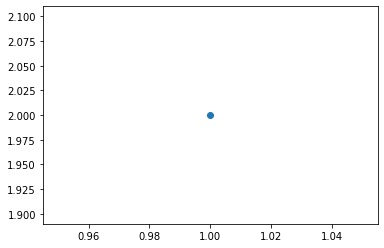

In [2]:
fig, ax = plt.subplots()

ax.plot(1, 2, 'o')